In [1]:
## Imports
from collections import defaultdict
from importlib import resources
import numpy as np
import torch
import matplotlib.pyplot as plt
from ac_solver.envs.ac_env import ACEnv
from ast import literal_eval

## Load data
filename = "greedy_search_paths.txt"
with resources.open_text('ac_solver.search.miller_schupp.data', filename) as file:
    gs_paths = [literal_eval(path) for path in file]

filename = "greedy_solved_presentations.txt"
with resources.open_text('ac_solver.search.miller_schupp.data', filename) as file:
    gs_solved = [np.array(literal_eval(presentation)) for presentation in file]

filename = "bfs_solved_presentations.txt"
with resources.open_text('ac_solver.search.miller_schupp.data', filename) as file:
    bfs_solved = [np.array(literal_eval(presentation)) for presentation in file]

filename = "all_presentations.txt"
with resources.open_text('ac_solver.search.miller_schupp.data', filename) as file:
    all_presentations = [np.array(literal_eval(presentation)) for presentation in file]

### Section 3

In [2]:
## how much does the length of a presentation have to get before it is simplified in greedy search

n_to_gs_excess_lengths_dict = {} 
lengths_to_gs_excess_lengths_dict = {} 
for presentation, path in zip(gs_solved, gs_paths):
    
    # compute total length of the presentation
    max_relator_length = len(presentation) // 2 
    first_relator = presentation[:max_relator_length]
    second_relator = presentation[max_relator_length:]
    presentation_length = np.count_nonzero(first_relator) + np.count_nonzero(second_relator)

    # compute n
    n = (np.count_nonzero(first_relator) - 3) // 2

    # compute the maximum value presentation length took during greedy search
    max_length_in_path = max([y for _, y in path])
 
    # record
    if presentation_length not in lengths_to_gs_excess_lengths_dict.keys():
        lengths_to_gs_excess_lengths_dict[presentation_length] = []

    if n not in n_to_gs_excess_lengths_dict.keys():
        n_to_gs_excess_lengths_dict[n] = []
        
    # record
    lengths_to_gs_excess_lengths_dict[presentation_length].append(max_length_in_path - presentation_length)
    n_to_gs_excess_lengths_dict[n].append(max_length_in_path - presentation_length)

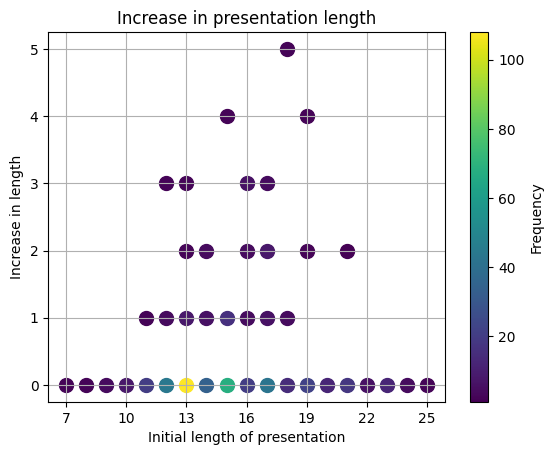

In [3]:
# Example data - replace with your actual data
data = lengths_to_gs_excess_lengths_dict

# Determine the maximum frequency to set color map size
max_freq = max([values.count(value) for _, values in data.items() for value in set(values)])

# Create a color map with sufficient colors
colors = plt.cm.viridis(np.linspace(0, 1, max_freq))  # Adjusted to max frequency

fig, ax = plt.subplots()

for key, values in data.items():
    value_count = {val: values.count(val) for val in values}
    for val, count in value_count.items():
        ax.scatter(key, val, s=100, color=colors[count-1], alpha=1.0)  # Index adjusted for count

# Create a colorbar as legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=1, vmax=max_freq))
cbar = plt.colorbar(sm, ax=ax, ticks=range(0, max_freq + 1, 20))
cbar.set_label('Frequency')

ax.set_title('Increase in presentation length')
ax.set_xlabel('Initial length of presentation')
ax.set_ylabel('Increase in length')
ax.set_xticks([7, 10, 13, 16, 19, 22, 25])
plt.grid(True)
# plt.savefig("./Images/gs_length_increase_vs_length.pdf")
plt.show()

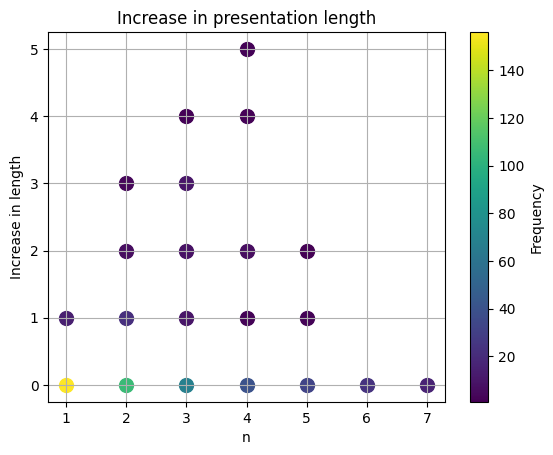

In [4]:
# Example data - replace with your actual data
data = n_to_gs_excess_lengths_dict

# Determine the maximum frequency to set color map size
max_freq = max([values.count(value) for _, values in data.items() for value in set(values)])

# Create a color map with sufficient colors
colors = plt.cm.viridis(np.linspace(0, 1, max_freq))  # Adjusted to max frequency

fig, ax = plt.subplots()

for key, values in data.items():
    value_count = {val: values.count(val) for val in values}
    for val, count in value_count.items():
        ax.scatter(key, val, s=100, color=colors[count-1], alpha=1.0)  # Index adjusted for count

# Create a colorbar as legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=1, vmax=max_freq))
cbar = plt.colorbar(sm, ax=ax, ticks=range(0, max_freq + 1, 20))
cbar.set_label('Frequency')

ax.set_title('Increase in presentation length')
ax.set_xlabel('n')
ax.set_ylabel('Increase in length')
ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
plt.grid(True)
# plt.savefig('/Users/alishehper/work/ac_paper/fig/gs_length_increase_vs_n.png')
# plt.savefig("./Images/gs_length_increase_vs_n.pdf")
plt.show()

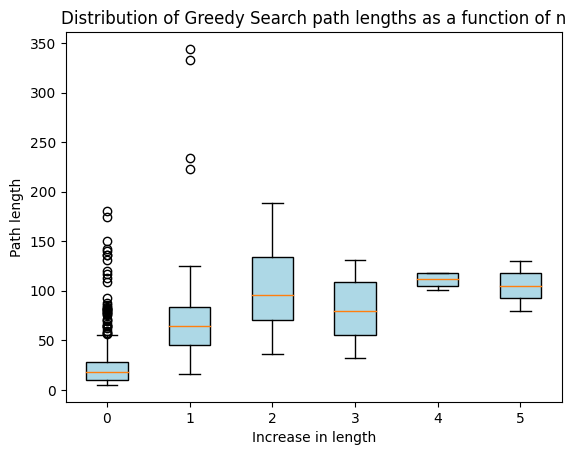

In [5]:
gs_excess_lengths_to_gs_path_lengths_dict = {}
for path in gs_paths:
    path_length = len(path) - 1
    max_length_increase = max([pres_length for _, pres_length in path]) - path[0][1]
    if max_length_increase not in gs_excess_lengths_to_gs_path_lengths_dict:
        gs_excess_lengths_to_gs_path_lengths_dict[max_length_increase] = []
    gs_excess_lengths_to_gs_path_lengths_dict[max_length_increase].append(path_length)

# Example data: a dictionary where the keys are values of n and the values are lists of data points
data = gs_excess_lengths_to_gs_path_lengths_dict
xs = sorted(list(data.keys()))
ys = [data[x] for x in xs]

# Colors for each box plot
colors =['#ADD8E6']*7

# Prepare the plot
fig, ax = plt.subplots()

# Create a boxplot with colors
boxplots = ax.boxplot(ys, patch_artist=True)

# Coloring each box
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Setting the labels for each box based on the dictionary keys
ax.set_xticklabels(xs)

# Labeling the axes
ax.set_xlabel('Increase in length')
ax.set_ylabel('Path length')

# Adding a title
ax.set_title('Distribution of Greedy Search path lengths as a function of n')

# plt.savefig('/Users/alishehper/work/ac_paper/fig/path_lengths_vs_length_increase.png')
# plt.savefig("./Images/path_lengths_vs_length_increase.pdf")
# Display the plot
plt.show()

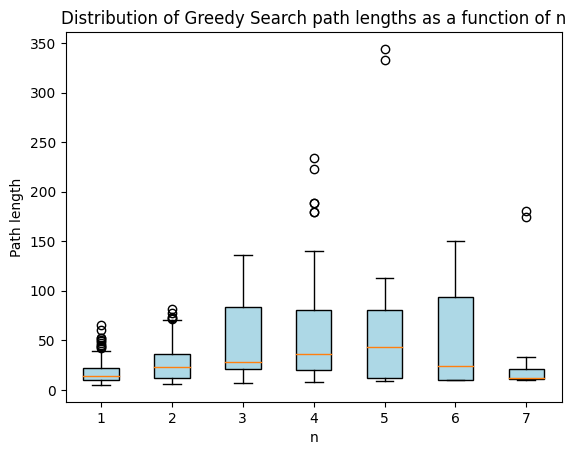

In [6]:
# how 
n_to_gs_path_lengths_dict = {}

for presentation, path in zip(gs_solved, gs_paths):

    # compute n
    max_relator_length = len(presentation) // 2 
    first_relator = presentation[:max_relator_length]
    n = (np.count_nonzero(first_relator) - 3) // 2

    if n not in n_to_gs_path_lengths_dict.keys():
        n_to_gs_path_lengths_dict[n] = []
    n_to_gs_path_lengths_dict[n].append(len(path)-1)

## making the boxplots
data = n_to_gs_path_lengths_dict
xs = sorted(list(data.keys()))
ys = [data[x] for x in xs]

colors =['#ADD8E6']*7
fig, ax = plt.subplots()
boxplots = ax.boxplot(ys, patch_artist=True)

# Coloring each box
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Setting the labels for each box based on the dictionary keys
ax.set_xticklabels(xs)

# Labeling the axes
ax.set_xlabel('n')
ax.set_ylabel('Path length')

# Adding a title
ax.set_title('Distribution of Greedy Search path lengths as a function of n')

# plt.savefig("./Images/gs_path_lengths.pdf")
# Display the plot
plt.show()

### Section 4

In [9]:
filename = "ppo.pt"
ckpt_path = resources.files('ac_solver.agents.checkpoints').joinpath(filename)
ppo_checkpoint = torch.load(ckpt_path, map_location="cpu")

id_to_ac_seq_dict = ppo_checkpoint['ACMoves_hist']
print(f"The loaded checkpoint of PPO agent solved {len(id_to_ac_seq_dict)} presentations.")

The loaded checkpoint of PPO agent solved 431 presentations.


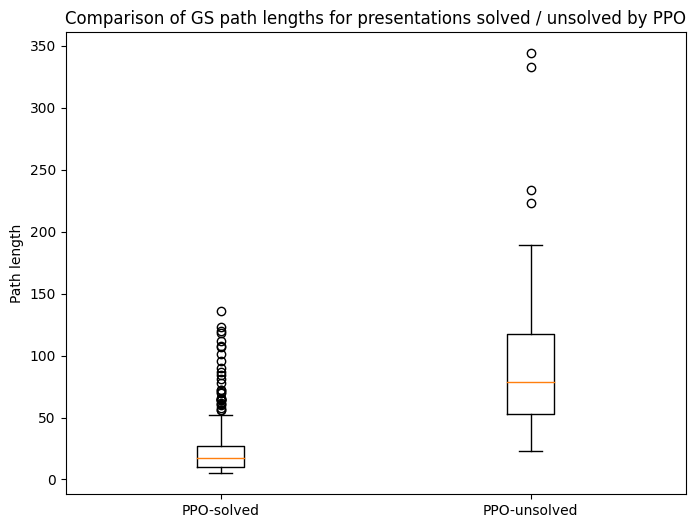

In [10]:
# What are the GS-path-lengths for presentations solved / unsolved by PPO?
gs_path_lengths_for_ppo_solved = []
gs_path_lengths_for_ppo_unsolved = []

for i, path in enumerate(gs_paths):
    if i in ppo_checkpoint['success_record']['solved']:
        gs_path_lengths_for_ppo_solved.append(len(path)-1)
    else:
        gs_path_lengths_for_ppo_unsolved.append(len(path)-1)

# Creating the boxplot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot([gs_path_lengths_for_ppo_solved, gs_path_lengths_for_ppo_unsolved], labels=['PPO-solved', 'PPO-unsolved'])  # Plot boxplots for both lists
plt.title('Comparison of GS path lengths for presentations solved / unsolved by PPO')  # Add a title
plt.ylabel('Path length')  # Label the y-axis

#plt.savefig('/Users/alishehper/work/ac_paper/fig/path_lengths_ppo_solved_vs_unsolved.png')
# plt.savefig("./Images/path_lengths_ppo_solved_vs_unsolved.pdf")
# Show the plot
plt.show()

In [11]:
# What are the lengths of paths found by PPO itself?
ppo_path_lengths_for_ppo_solved = []

for i, path in enumerate(gs_paths):
    if i in ppo_checkpoint['success_record']['solved']:
        ppo_path_lengths_for_ppo_solved.append(len(id_to_ac_seq_dict[i]))

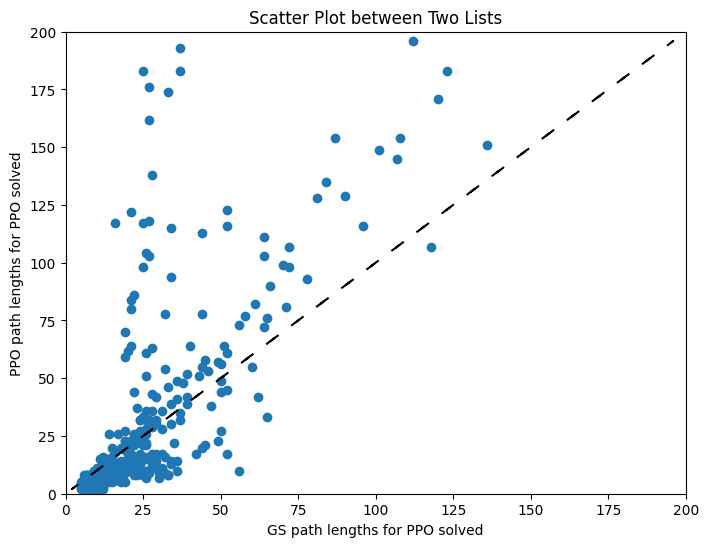

In [12]:
# Example data
x_values = gs_path_lengths_for_ppo_solved
y_values = ppo_path_lengths_for_ppo_solved

# Creating the scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(x_values, y_values)  # Plot the data points as a scatter plot
plt.plot(y_values, y_values, linestyle=(0, (5, 10)), label='y = x', color='black')
plt.title('Scatter Plot between Two Lists')  # Add a title
plt.xlabel('GS path lengths for PPO solved')  # Label the x-axis
plt.ylabel('PPO path lengths for PPO solved')  # Label the y-axis

# Set axis limits and ticks
axis_limits = [0, 200]  # Define common limits for x and y axes
ticks = [0, 25, 50, 75, 100, 125, 150, 175, 200]  # Define ticks

plt.xlim(axis_limits)  # Set the x-axis limits
plt.ylim(axis_limits)  # Set the y-axis limits
plt.xticks(ticks)  # Set the x-axis ticks
plt.yticks(ticks)  # Set the y-axis ticks

# plt.savefig('/Users/alishehper/work/ac_paper/fig/path_lengths_gs_vs_ppo.png')
# plt.savefig("./Images/path_lengths_gs_vs_ppo.pdf")
# Show the plot
plt.show()

### Section 1

In [13]:
## For each n and presentation, get the number of examples that each of the three algorithms solve

## Initiate data
# GS
n_to_gs_num_solved = [0]*7
length_to_gs_num_solved = defaultdict(int)

# BFS
n_to_bfs_num_solved = [0]*7
length_to_bfs_num_solved = defaultdict(int)

# PPO
n_to_ppo_solved = [0]*7
length_to_ppo_num_solved = defaultdict(int)

# All presentations
length_to_num_presentations = defaultdict(int)

for id, presentation in enumerate(all_presentations):

    # compute n
    max_relator_length = len(presentation) // 2 
    first_relator = presentation[:max_relator_length]
    n = (np.count_nonzero(first_relator) - 3) // 2

    # compute total presentation length
    presentation_length = np.count_nonzero(first_relator) + np.count_nonzero(presentation[max_relator_length:])

    ## record info
    length_to_num_presentations[presentation_length] += 1

    # record info for GS
    if any(np.array_equal(presentation, arr) for arr in gs_solved):
        length_to_gs_num_solved[presentation_length] += 1
        n_to_gs_num_solved[n-1] += 1

    # record info for BFS
    if any(np.array_equal(presentation, arr) for arr in bfs_solved):
        n_to_bfs_num_solved[n-1] += 1
        length_to_bfs_num_solved[presentation_length] += 1

    # record info for PPO
    if id in ppo_checkpoint["success_record"]["solved"]:
        n_to_ppo_solved[n-1] += 1
        length_to_ppo_num_solved[presentation_length] += 1

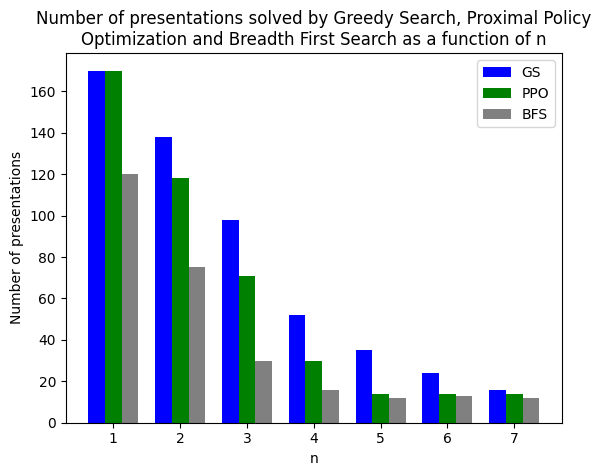

In [14]:
n = ['1', '2', '3', '4', '5', '6', '7']  
X_axis = np.arange(len(n)) 

# Width of the bar
barWidth = 0.25

# Set position of bar on X axis
r1 = X_axis - barWidth
r2 = X_axis
r3 = X_axis + barWidth

# Make the plot
plt.bar(r1, n_to_gs_num_solved, width=barWidth, label='GS', color='blue')
plt.bar(r2, n_to_ppo_solved, width=barWidth, label='PPO', color='green') 
plt.bar(r3, n_to_bfs_num_solved, width=barWidth, label='BFS', color='grey')

# Adding xticks
plt.xticks(X_axis, n)
plt.xlabel("n")
plt.ylabel("Number of presentations")
plt.title("""Number of presentations solved by Greedy Search, Proximal Policy
Optimization and Breadth First Search as a function of n""")
plt.legend()

# plt.savefig('/Users/alishehper/work/ac_paper/fig/performance_vs_n.png')
# Display the figure
# plt.savefig("./Images/performance_vs_n.pdf")
plt.show()

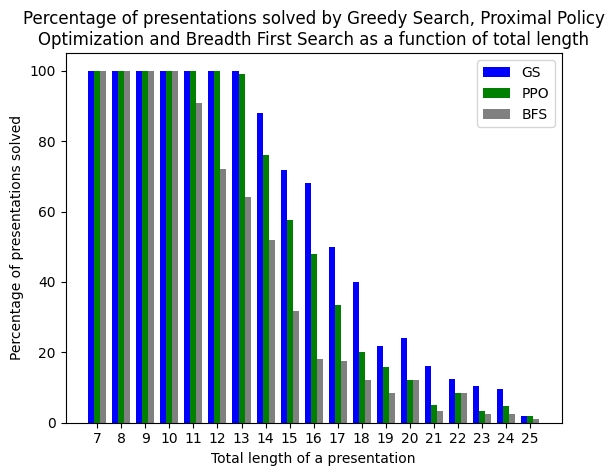

In [15]:
lengths = sorted(list(length_to_gs_num_solved.keys()))
Y = [length_to_gs_num_solved.get(length, 0) / length_to_num_presentations[length] * 100 for length in lengths]
Z = [length_to_bfs_num_solved.get(length, 0) / length_to_num_presentations[length] * 100 for length in lengths]
W = [length_to_ppo_num_solved.get(length, 0) / length_to_num_presentations[length] * 100 for length in lengths]  

X_axis = np.arange(len(lengths))

# Width of the bar
barWidth = 0.25

# Set position of bar on X axis
r1 = X_axis - barWidth
r2 = X_axis
r3 = X_axis + barWidth

# Make the plot
plt.bar(r1, Y, width=barWidth, label='GS', color='blue')
plt.bar(r2, W, width=barWidth, label='PPO', color='green')
plt.bar(r3, Z, width=barWidth, label='BFS', color='grey')

# Adding xticks
plt.xticks(X_axis, lengths)
plt.xlabel("Total length of a presentation")
plt.ylabel("Percentage of presentations solved")
plt.title("""Percentage of presentations solved by Greedy Search, Proximal Policy
Optimization and Breadth First Search as a function of total length""")
plt.legend()

# plt.savefig('/Users/alishehper/work/ac_paper/fig/performance_vs_length.png')

# plt.savefig("./Images/performance_vs_length.pdf")
# Display the figure
plt.show()